# One Component Plasma (OCP)

Oh the good ol' OCP. 
The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/OCP/input_files/coulomb_cgs.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/OCP/OCP.ipynb).

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
plt.style.use('MSUstyle')

import pandas as pd
pd.options.display.max_columns = 15

# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess


# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'coulomb_cgs.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## PreProcessing

The following code is commented out since the simulation has been run before. We leave it here so that it is easy to copy and paste in your notebook.

In [2]:
# preproc = PreProcess(input_file_name)
# preproc.setup(read_yaml=True)
# preproc.run(pppm_estimate=True)

## Simulation

The following code is commented out since the simulation has been run before. 
We leave it here so that it is easy to copy and paste in your notebook.

In [3]:
# sim = Simulation(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()

## PostProcessing

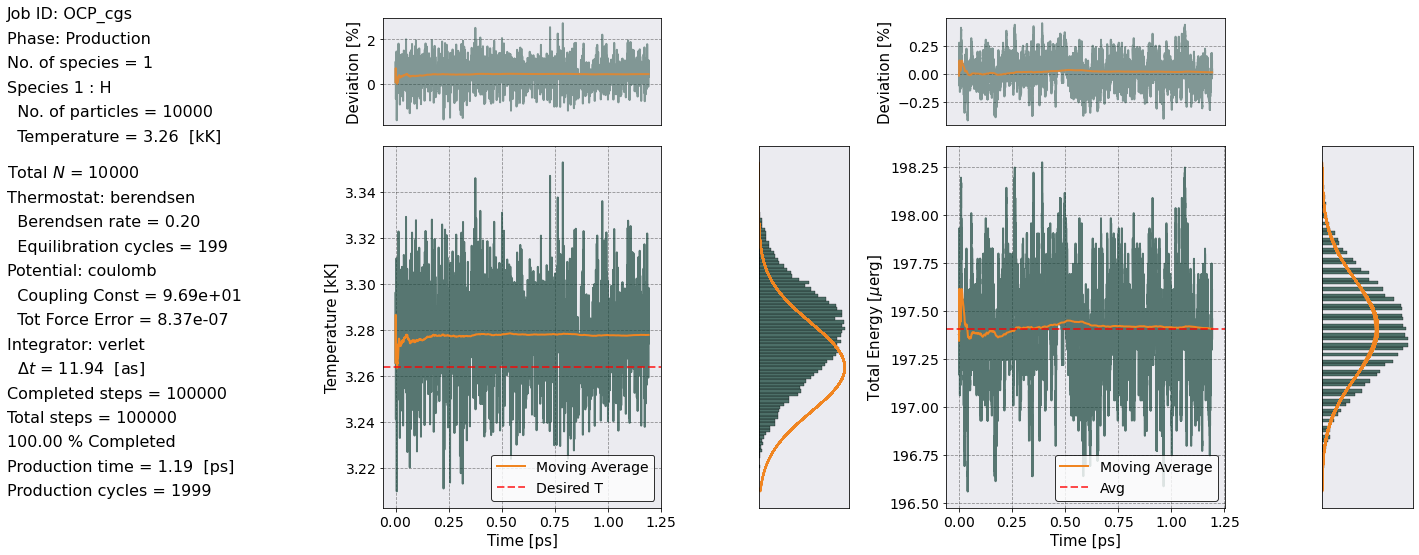

In [4]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc)

## Radial Distribution Function

In [5]:
postproc.rdf.setup(postproc.parameters)
postproc.rdf.compute()

  0%|          | 0/1 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 0 sec 54 msec 472 usec 443 nsec


<AxesSubplot:xlabel='$r/a_{\\rm ws}$'>

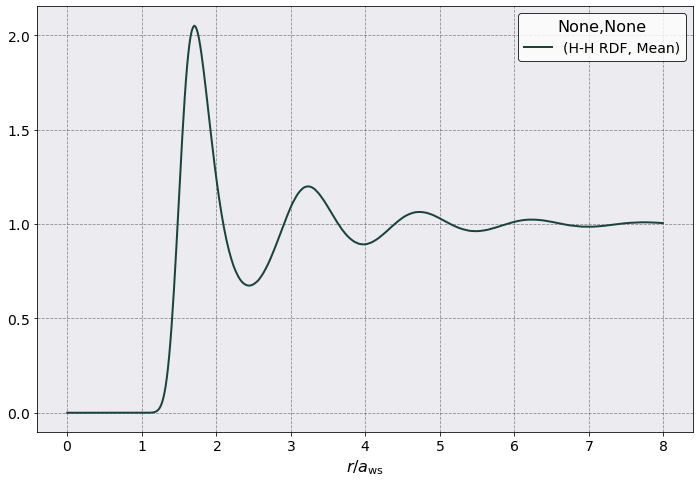

In [6]:
postproc.rdf.plot(scaling = postproc.rdf.a_ws,
                  y = ("H-H RDF", "Mean"),
                  xlabel = r'$r/a_{\rm ws}$')

Calculate the Pressure from the RDF

In [7]:
n_beta =  postproc.therm.beta / ( postproc.parameters.total_num_ptcls)
nkT, u_h, u_c, p_h, p_c = postproc.therm.compute_from_rdf(postproc.rdf, postproc.potential)
print('The excess pressure is = {:.4e} / (n k_B T)'.format(u_c[0] * n_beta ))

The excess pressure is = -8.2438e+01 / (n k_B T)


## Dynamic Structure Factor

In [8]:
from sarkas.tools.observables import DynamicStructureFactor

dsf = DynamicStructureFactor()
dsf.max_ka_value = 10
dsf.angle_averaging = 'principal_axis'
dsf.no_slices = 4
dsf.setup(postproc.parameters)
dsf.pretty_print()



====================== Dynamic Structure Factor ====================== 

k wavevector information saved in: 
 Simulations/OCP_cgs/PostProcessing/k_space_data/k_arrays.npz
n(k,t) data saved in: 
 Simulations/OCP_cgs/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/OCP_cgs/PostProcessing/DynamicStructureFactor/Production/DynamicStructureFactor_OCP_cgs.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.frequencies, self.dataframe

Frequency Space Parameters:
	No. of slices = 1
	No. dumps per slice = 50001
	Frequency step dw = 2 pi (no_slices * prod_dump_step)/(production_steps * dt)
	dw = 0.0031 w_p = 5.2642e+12 [rad/s]
	Maximum Frequency w_max = 2 pi /(prod_dump_step * dt)
	w_max = 78.5487 w_p = 1.3161e+17 [rad/s]


Wavevector parameters:
Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.1809 / a_ws = 3.4252e+07 [1/cm]

Angle averaging choice: principal_axis
	Maximum k harmonics = n_x, n_y, n_z = 55, 55, 55
	Largest wavector k_max = k_mi

In [9]:
dsf.parse()

In [10]:
dsf.dataframe

H-H                                            \
                             Mean                                             
        Frequencies  ka1 = 0.1809  ka2 = 0.3618  ka3 = 0.5428  ka4 = 0.7237   
0     -1.316086e+17  4.879578e-25  1.472862e-25  2.390647e-25  2.450585e-25   
1     -1.315876e+17  4.879578e-25  1.472866e-25  2.390647e-25  2.450578e-25   
2     -1.315665e+17  4.879578e-25  1.472870e-25  2.390648e-25  2.450572e-25   
3     -1.315455e+17  4.879579e-25  1.472874e-25  2.390650e-25  2.450566e-25   
4     -1.315244e+17  4.879581e-25  1.472878e-25  2.390651e-25  2.450560e-25   
...             ...           ...           ...           ...           ...   
12495  1.315033e+17  4.879589e-25  1.472846e-25  2.390648e-25  2.450623e-25   
12496  1.315244e+17  4.879585e-25  1.472849e-25  2.390647e-25  2.450615e-25   
12497  1.315455e+17  4.879583e-25  1.472852e-25  2.390646e-25  2.450607e-25   
12498  1.315665e+17  4.879581e-25  1.472855e-25  2.390646e-25  2.450599e-25   
12499  1.315876e+17  4.879579e-25  1.472859e-25  2.390646e-25  2.450592e-25   

                                   ...                              \
                                   ...           Std                 
       ka5 = 0.9046  ka6 = 1.0855  ... ka49 = 8.8650 ka50 = 9.0459   
0      7.464846e-25  1.143595e-24  ...  3.108407e-22  2.788587e-22   
1      7.464843e-25  1.143596e-24  ...  3.108408e-22  2.788584e-22   
2      7.464841e-25  1.143597e-24  ...  3.108409e-22  2.788580e-22   
3      7.464840e-25  1.143599e-24  ...  3.108411e-22  2.788577e-22   
4      7.464840e-25  1.143600e-24  ...  3.108413e-22  2.788575e-22   
...             ...           ...  ...           ...           ...   
12495  7.464874e-25  1.143593e-24  ...  3.108409e-22  2.788611e-22   
12496  7.464866e-25  1.143593e-24  ...  3.108408e-22  2.788606e-22   
12497  7.464860e-25  1.143593e-24  ...  3.108407e-22  2.788601e-22   
12498  7.464854e-25  1.143594e-24  ...  3.108406e-22  2.788596e-22   
12499  7.464850e-25  1.143595e-24  ...  3.108407e-22  2.788591e-22   

                                                                             
                                                                             
      ka51 = 9.2269 ka52 = 9.4078 ka53 = 9.5887 ka54 = 9.7696 ka55 = 9.9505  
0      1.524755e-22  2.245008e-22  5.311622e-23  2.032679e-22  1.299485e-22  
1      1.524759e-22  2.245011e-22  5.311582e-23  2.032684e-22  1.299482e-22  
2      1.524764e-22  2.245014e-22  5.311542e-23  2.032690e-22  1.299479e-22  
3      1.524769e-22  2.245017e-22  5.311503e-23  2.032697e-22  1.299476e-22  
4      1.524774e-22  2.245021e-22  5.311465e-23  2.032703e-22  1.299474e-22  
...             ...           ...           ...           ...           ...  
12495  1.524735e-22  2.245000e-22  5.311834e-23  2.032654e-22  1.299503e-22  
12496  1.524738e-22  2.245001e-22  5.311790e-23  2.032658e-22  1.299499e-22  
12497  1.524742e-22  2.245002e-22  5.311747e-23  2.032663e-22  1.299495e-22  
12498  1.524746e-22  2.245004e-22  5.311705e-23  2.032668e-22  1.299492e-22  
12499  1.524750e-22  2.245006e-22  5.311663e-23  2.032673e-22  1.299488e-22  

[12500 rows x 111 columns]

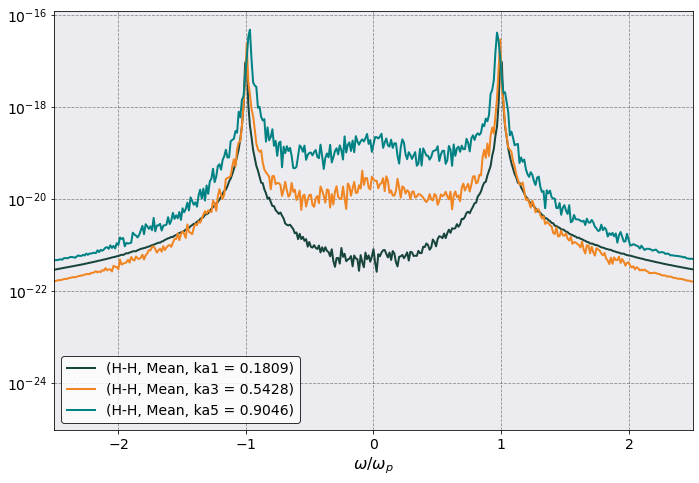

In [11]:
ax = dsf.plot(scaling = dsf.total_plasma_frequency, 
         y = [("H-H","Mean", "ka1 = 0.1809"), ("H-H","Mean", "ka3 = 0.5428"), ("H-H","Mean", "ka5 = 0.9046")],
         xlabel = r'$\omega/\omega_p$',
         xlim = (-2.5, 2.5),
        logy = True)
ax.legend()

### Collective Mode Dispersion

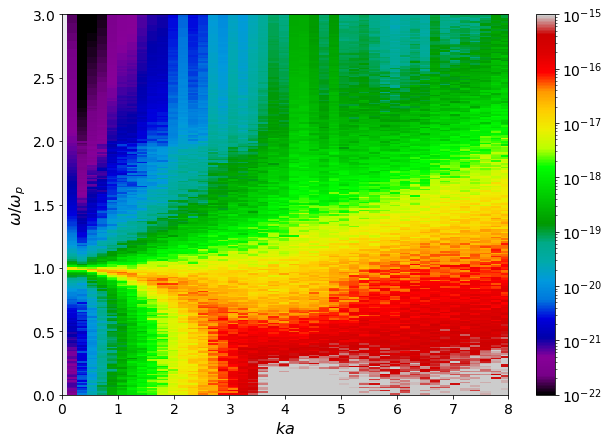

In [12]:
w = dsf.dataframe[(" "," ","Frequencies")]/ dsf.total_plasma_frequency

ka_mesh, w_mesh = np.meshgrid(dsf.ka_values, w)

Skw = dsf.dataframe[("H-H", "Mean")]
fig, ax = plt.subplots(1,1)
pc = ax.pcolormesh(ka_mesh, w_mesh, Skw,
                   shading = 'auto',
                   norm = mpl.colors.LogNorm(vmin = 1e-22, vmax = 1e-15),
                   cmap='nipy_spectral')
ax.set(ylim = (0,3),
       xlim = (0,8),
       xlabel = r'$ka$', 
       ylabel = r'$\omega/\omega_p$')
plt.colorbar(pc)

In [13]:
from sarkas.tools.observables import CurrentCorrelationFunction

ccf = CurrentCorrelationFunction()
ccf.max_ka_value = 10
ccf.angle_averaging = 'principal_axis'
ccf.no_slices = 4
ccf.setup(postproc.parameters)
ccf.pretty_print()



==================== Current Correlation Function ==================== 

k wavevector information saved in: 
 Simulations/OCP_cgs/PostProcessing/k_space_data/k_arrays.npz
v(k,t) data saved in: 
 Simulations/OCP_cgs/PostProcessing/k_space_data/vkt.h5
Data saved in: 
Simulations/OCP_cgs/PostProcessing/CurrentCorrelationFunction/Production/CurrentCorrelationFunction_OCP_cgs.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.frequencies, 
	 self.dataframe

Frequency Space Parameters:
	No. of slices = 4
	No. dumps per slice = 12500
	Frequency step dw = 2 pi (no_slices * prod_dump_step)/(production_steps * dt)
	dw = 0.0126 w_p = 2.1057e+13 [rad/s]
	Maximum Frequency w_max = 2 pi /(prod_dump_step * dt)
	w_max = 78.5487 w_p = 1.3161e+17 [rad/s]


Wavevector parameters:
Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.1809 / a_ws = 3.4252e+07 [1/cm]

Angle averaging choice: principal_axis
	Maximum k harmonics = n_x, n_y, n_z = 55, 55, 55
	Largest wavector k_

In [14]:
# ccf.compute()
ccf.parse()

In [15]:
ccf.dataframe

Longitudinal                                \
                               H-H                                 
                              Mean                                 
                      ka1 = 0.1809   ka2 = 0.3618   ka3 = 0.5428   
        Frequencies            NaN            NaN            NaN   
0     -1.316086e+17  297360.958948  550841.305756  741502.511222   
1     -1.315876e+17  297360.776416  550842.124002  741502.375627   
2     -1.315665e+17  297360.647363  550843.139040  741502.337668   
3     -1.315455e+17  297360.545013  550844.190843  741502.511066   
4     -1.315244e+17  297360.479300  550845.235350  741502.714944   
...             ...            ...            ...            ...   
12495  1.315033e+17  297362.379926  550837.777453  741504.525321   
12496  1.315244e+17  297362.038693  550838.295542  741504.077521   
12497  1.315455e+17  297361.694330  550838.950322  741503.502435   
12498  1.315665e+17  297361.427877  550839.707170  741503.103073   
12499  1.315876e+17  297361.173344  550840.413166  741502.795738   

                                                 ...    Transverse  \
                                                 ...           H-H   
                                                 ...           Std   
       ka4 = 0.7237  ka5 = 0.9046  ka6 = 1.0855  ... ka49 = 8.8650   
                NaN           NaN           NaN  ...           NaN   
0      1.016348e+06  1.514701e+06  2.271082e+06  ...  7.750616e+07   
1      1.016346e+06  1.514700e+06  2.271084e+06  ...  7.750625e+07   
2      1.016345e+06  1.514699e+06  2.271087e+06  ...  7.750636e+07   
3      1.016343e+06  1.514697e+06  2.271090e+06  ...  7.750648e+07   
4      1.016342e+06  1.514696e+06  2.271093e+06  ...  7.750661e+07   
...             ...           ...           ...  ...           ...   
12495  1.016359e+06  1.514712e+06  2.271074e+06  ...  7.750583e+07   
12496  1.016357e+06  1.514710e+06  2.271075e+06  ...  7.750587e+07   
12497  1.016354e+06  1.514707e+06  2.271076e+06  ...  7.750592e+07   
12498  1.016352e+06  1.514705e+06  2.271078e+06  ...  7.750600e+07   
12499  1.016350e+06  1.514703e+06  2.271080e+06  ...  7.750607e+07   

                                                                             \
                                                                              
                                                                              
      ka50 = 9.0459 ka51 = 9.2269 ka52 = 9.4078 ka53 = 9.5887 ka54 = 9.7696   
                NaN           NaN           NaN           NaN           NaN   
0      5.889132e+07  9.418742e+07  5.108627e+07  7.961882e+07  1.341673e+08   
1      5.889105e+07  9.418693e+07  5.108631e+07  7.961854e+07  1.341673e+08   
2      5.889082e+07  9.418642e+07  5.108637e+07  7.961826e+07  1.341674e+08   
3      5.889055e+07  9.418595e+07  5.108642e+07  7.961800e+07  1.341674e+08   
4      5.889032e+07  9.418548e+07  5.108648e+07  7.961773e+07  1.341676e+08   
...             ...           ...           ...           ...           ...   
12495  5.889277e+07  9.419012e+07  5.108613e+07  7.962035e+07  1.341672e+08   
12496  5.889246e+07  9.418956e+07  5.108616e+07  7.962006e+07  1.341671e+08   
12497  5.889217e+07  9.418901e+07  5.108617e+07  7.961974e+07  1.341672e+08   
12498  5.889188e+07  9.418847e+07  5.108619e+07  7.961942e+07  1.341672e+08   
12499  5.889160e+07  9.418794e+07  5.108622e+07  7.961910e+07  1.341672e+08   

                     
                     
                     
      ka55 = 9.9505  
                NaN  
0      2.069157e+08  
1      2.069154e+08  
2      2.069150e+08  
3      2.069148e+08  
4      2.069145e+08  
...             ...  
12495  2.069178e+08  
12496  2.069173e+08  
12497  2.069169e+08  
12498  2.069165e+08  
12499  2.069160e+08  

[12500 rows x 221 columns]

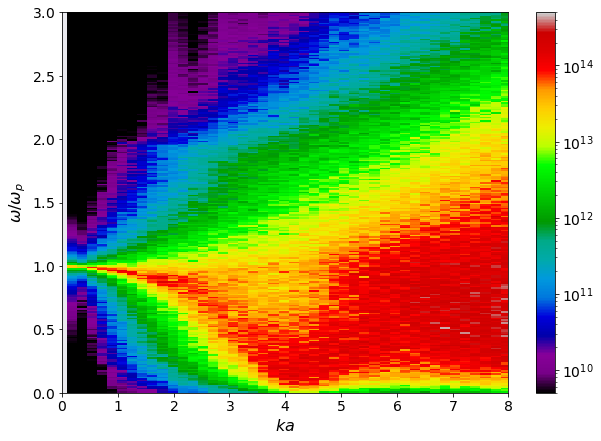

In [16]:
w = dsf.dataframe[(" "," ","Frequencies")]/ ccf.total_plasma_frequency

ka_mesh, w_mesh = np.meshgrid(dsf.ka_values, w)

Lkw = ccf.dataframe[("Longitudinal", "H-H", "Mean")]
fig, ax = plt.subplots(1,1)
pc = ax.pcolormesh(ka_mesh, w_mesh, Lkw,
                   shading = 'auto',
                   norm = mpl.colors.LogNorm(vmin = 0.5e10, vmax = 0.5e15),
                   cmap='nipy_spectral')
ax.set(ylim = (0,3),
       xlim = (0,8),
       xlabel = r'$ka$', 
       ylabel = r'$\omega/\omega_p$')
plt.colorbar(pc)

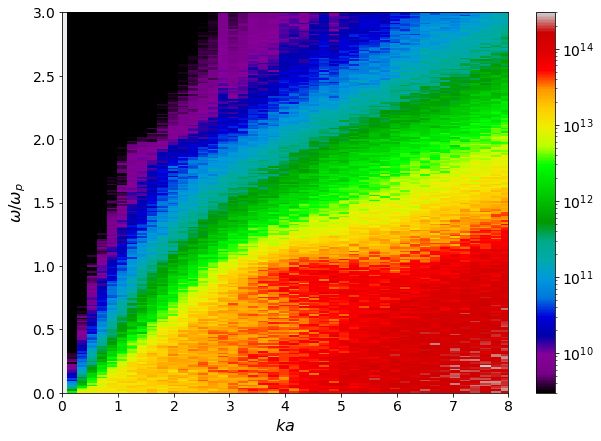

In [17]:
w = dsf.dataframe[(" "," ","Frequencies")]/ ccf.total_plasma_frequency

ka_mesh, w_mesh = np.meshgrid(dsf.ka_values, w)

Lkw = ccf.dataframe[("Transverse", "H-H", "Mean")]
fig, ax = plt.subplots(1,1)
pc = ax.pcolormesh(ka_mesh, w_mesh, Lkw,
                   shading = 'auto',
                   norm = mpl.colors.LogNorm(vmin = 3e9, vmax = 3e14),
                   cmap='nipy_spectral')
ax.set(ylim = (0,3),
       xlim = (0,8),
       xlabel = r'$ka$', 
       ylabel = r'$\omega/\omega_p$')
plt.colorbar(pc)

## Diffusion

Diffusion is calculated from the integral of the velocity autocorrelation function, $\left \langle \bar{\mathbf v} (t) \cdot \bar{\mathbf v}(0) \right \rangle$,

\begin{equation}
D = \frac{1}{3} \int_0^{\tau} dt \, \left \langle \bar{\mathbf v} (t) \cdot \bar{\mathbf v}(0) \right \rangle
\end{equation}

where $\bar{\mathbf v}$ is the particle-averaged velocity.

In [18]:
from sarkas.tools.observables import VelocityAutoCorrelationFunction
from sarkas.tools.transport import TransportCoefficients

In [19]:
vacf = VelocityAutoCorrelationFunction()
vacf.setup(postproc.parameters, no_slices=4)

In [20]:
vacf.parse()



======================= Diffusion Coefficient ======================== 

Data saved in: 
 Simulations/OCP_cgs/PostProcessing/TransportCoefficients/Production/Diffusion_OCP_cgs.h5
Simulations/OCP_cgs/PostProcessing/TransportCoefficients/Production/Diffusion_slices_OCP_cgs.h5

No. of slices = 4
No. dumps per slice = 6250
Time interval of autocorrelation function = 2.9838e-13 [s] ~ 499 w_p T


  0%|          | 0/4 [00:00<?, ?it/s]

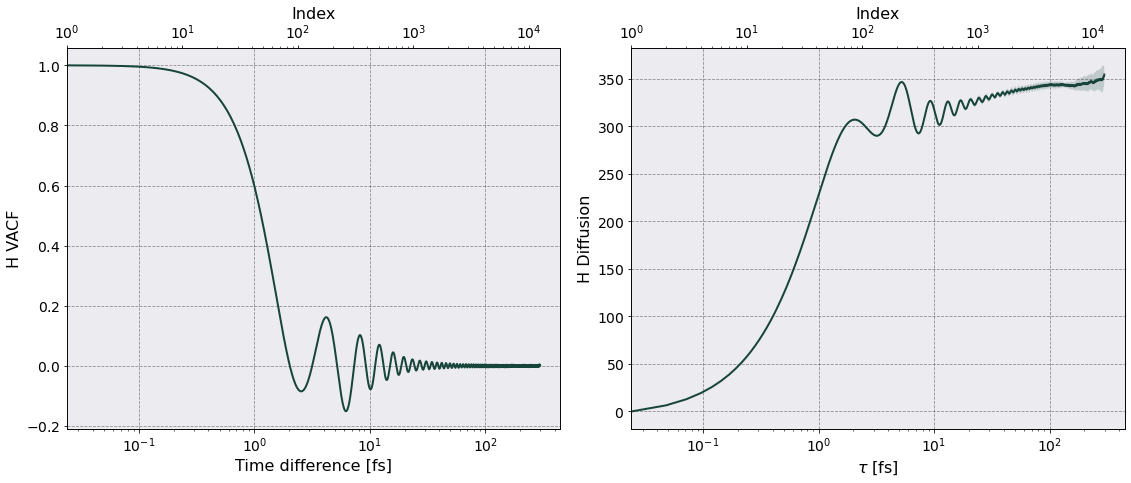

In [21]:
tc = TransportCoefficients(postproc.parameters, no_slices = 4)
tc.diffusion(vacf, plot=True)

[Text(0.5, 0, '$\\tau \\omega_p$'), Text(0, 0.5, ' $D/a^2 \\omega_p$')]

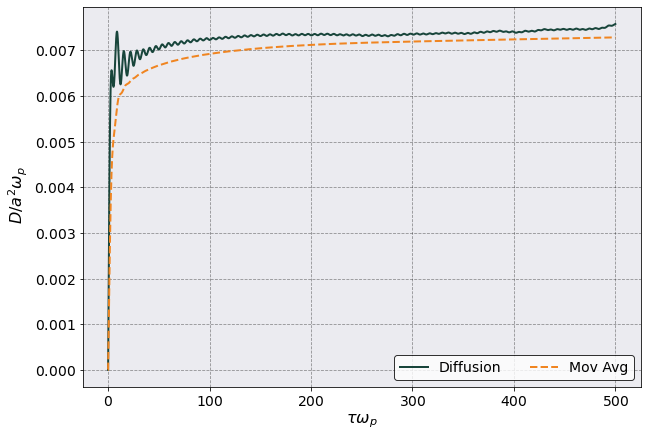

In [22]:
rescaling = 1.0/vacf.total_plasma_frequency/vacf.a_ws**2
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(tc.diffusion_df["Time"].iloc[:,0]*vacf.total_plasma_frequency, 
        tc.diffusion_df[("H Diffusion","Mean")] * rescaling,
       label = r'Diffusion')

ax.plot(tc.diffusion_df["Time"].iloc[:,0]*vacf.total_plasma_frequency, 
        tc.diffusion_df[("H Diffusion","Mean")].expanding().mean() * rescaling,
        ls = '--', label = r'Mov Avg')

ax.legend(ncol = 2)
ax.set(xlabel = r"$\tau \omega_p$",ylabel = r" $D/a^2 \omega_p$")